# Youtube Adview Prediction 

## Data Description

The file train.csv contains metrics and other details of about 15000 youtube
videos. The metrics include number of views, likes, dislikes, comments and
apart from that published date, duration and category are also included.
The train.csv file also contains the metric number of adviews which is our
target variable for prediction.

### Data :
Use the below link to download the Data Set:
https://drive.google.com/file/d/1Dv-HF10AUUA03AO_cQvar462eXawk0iQ/view?usp=sharing

### Context :
Youtube advertisers pay content creators based on adviews and clicks for the
goods and services being marketed. They want to estimate the adview based
on other metrics like comments, likes etc. The problem statement is therefore
to train various regression models and choose the best one to predict the
number of adviews. The data needs to be refined and cleaned before feeding
in the algorithms for better results.

### Attribute Information
- 'vidid' : Unique Identification ID for each video
- 'adview' : The number of adviews for each video
- 'views' : The number of unique views for each video
- 'likes' : The number of likes for each video
- 'dislikes' : The number of likes for each video
- 'comment' : The number of unique comments for each video
- 'published' : The data of uploading the video
- 'duration' : The duration of the video (in min. and seconds)
- 'category' : Category niche of each of the video

### Objective
To build a machine learning regression to predict youtube adview count based
on other youtube metrics.


## Importing Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import keras
from keras.layers import Dense
import joblib

## Importing data

In [69]:
data_train = pd.read_csv("data\\train.csv")
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [70]:
data_train.shape

(14999, 9)

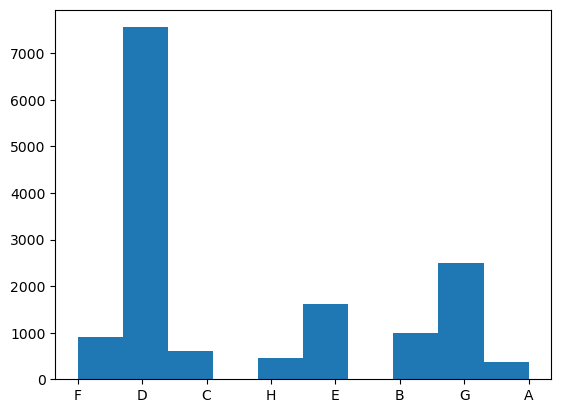

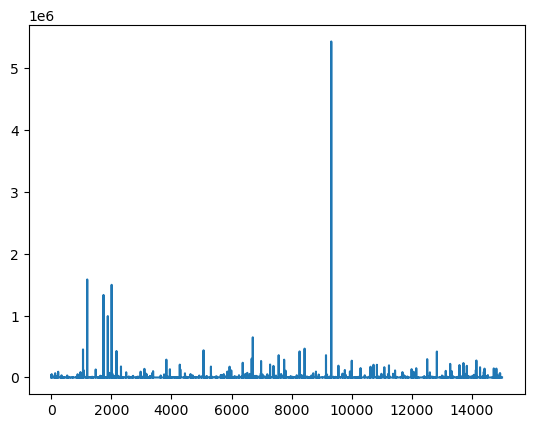

In [28]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()


In [29]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

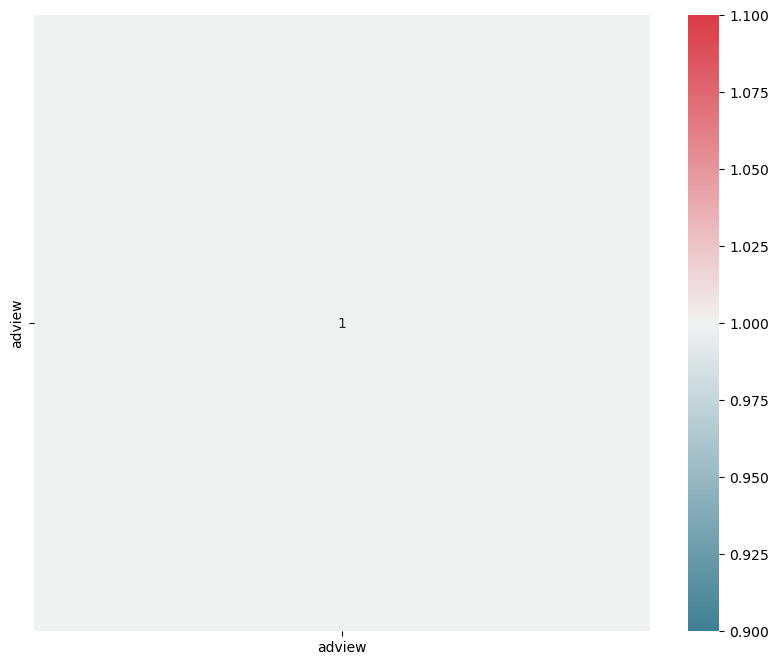

In [30]:
# Heatmap
import seaborn as sns
numeric_data_train = data_train.select_dtypes(include=np.number)

f, ax = plt.subplots(figsize=(10, 8))
corr = numeric_data_train.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

plt.show()

In [43]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [44]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

In [45]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [46]:
import pandas as pd

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H', 'M', 'S']
    for i in y:
        if i not in P:
            mm += i
        else:
            if i == "H":
                h = mm
                mm = ''
            elif i == "M":
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if h == '':
        h = '00'
    if m == '':
        m = '00'
    if s == '':
        s = '00'
    bp = h + ':' + m + ':' + s
    return bp

# Load the CSV file
train = pd.read_csv("data//train.csv")

# Extract the "duration" column and process the times using checki function
mp = train["duration"]
time = mp.apply(checki)

# Function to convert time string to seconds
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

# Apply the conversion function to the processed times
time1 = time.apply(func_sec)

# Create a new "duration" column in the DataFrame data_train
data_train = train.copy()  # Assuming data_train is a copy of the original DataFrame
data_train["duration"] = time1

# Display the first few rows of the updated DataFrame
print(data_train.head())


       vidid  adview    views likes dislikes comment   published  duration  \
0  VID_18655      40  1031602  8523      363    1095  2016-09-14       457   
1  VID_14135       2     1707    56        2       6  2016-10-01       570   
2   VID_2187       1     2023    25        0       2  2016-07-02       136   
3  VID_23096       6   620860   777      161     153  2016-07-27       262   
4  VID_10175       1      666     1        0       0  2016-06-29        31   

  category  
0        F  
1        D  
2        C  
3        H  
4        D  


In [47]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,457,6
1,VID_14135,2,1707,56,2,6,2016-10-01,570,4
2,VID_2187,1,2023,25,0,2,2016-07-02,136,3
3,VID_23096,6,620860,777,161,153,2016-07-27,262,8
4,VID_10175,1,666,1,0,0,2016-06-29,31,4


In [48]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,453,6
1,2741,2,1707,56,2,6,2185,566,4
2,8138,1,2023,25,0,2,2094,132,3
3,9005,6,620860,777,161,153,2119,258,8
4,122,1,666,1,0,0,2091,27,4


In [49]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,453,6
1,1707,56,2,6,2185,566,4
2,2023,25,0,2,2094,132,3
3,620860,777,161,153,2119,258,8
4,666,1,0,0,2091,27,4


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11709, 7)

In [51]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1993957952972239

In [52]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):

    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [53]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 5370.597673156438
Mean Squared Error: 10879451001.924519
Root Mean Squared Error: 104304.60681065108


In [54]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

C:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 5370.597673156438
Mean Squared Error: 10879451001.924519
Root Mean Squared Error: 104304.60681065108


In [55]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 5307.849385245901
Mean Squared Error: 11805299680.615778
Root Mean Squared Error: 108652.19593094186


In [60]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

C:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 5209.568871050374
Mean Squared Error: 10429718312.083267
Root Mean Squared Error: 102125.99234319961


In [61]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [62]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 767617344.0000 - mean_squared_error: 767617344.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767608320.0000 - mean_squared_error: 767608320.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767592320.0000 - mean_squared_error: 767592320.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767567488.0000 - mean_squared_error: 767567488.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767533248.0000 - mean_squared_error: 767533248.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767486720.0000 - mean_squared_error: 767486720.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767428032.0000 - mean_squared_error: 767428032.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767360448.0000 - mean_squared_error:

366/366 [==============================] - 1s 2ms/step - loss: 763336128.0000 - mean_squared_error: 763336128.0000
Epoch 66/100
366/366 [==============================] - 1s 2ms/step - loss: 763299392.0000 - mean_squared_error: 763299392.0000
Epoch 67/100
366/366 [==============================] - 1s 2ms/step - loss: 763269632.0000 - mean_squared_error: 763269632.0000
Epoch 68/100
366/366 [==============================] - 1s 2ms/step - loss: 763234880.0000 - mean_squared_error: 763234880.0000
Epoch 69/100
366/366 [==============================] - 1s 2ms/step - loss: 763200960.0000 - mean_squared_error: 763200960.0000
Epoch 70/100
366/366 [==============================] - 1s 2ms/step - loss: 763169024.0000 - mean_squared_error: 763169024.0000
Epoch 71/100
366/366 [==============================] - 1s 2ms/step - loss: 763137664.0000 - mean_squared_error: 763137664.0000
Epoch 72/100
366/366 [==============================] - 1s 2ms/step - loss: 763107264.0000 - mean_squared_error: 7631

In [71]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")